In [1]:
#dependencies

import numpy as np
import utils


import tensorflow as tf
import vgg16



######### constants
# required vgg image sizes 
VGG_SIZE_X = 224
VGG_SIZE_Y = 224
VGG_SIZE_Z = 3

# constants for the images
NUM_VIEWS = 1 


In [2]:

# to test how the utils.load_image was cutting the image off 
%matplotlib inline
from scipy.misc import imread, imresize
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


(224, 224, 3)


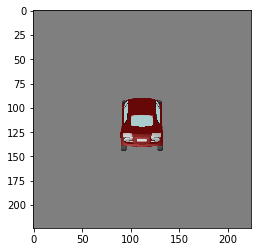

In [20]:
img1 = utils.load_image("./test_data/limoToSUV_40_15.png.png")
img1 = utils.load_image(imgloc)

batch1 = img1.reshape((1, 224, 224, 3))


imgplot = plt.imshow(img1)

In [2]:
# to upload multiple images

cars = ['limoToSUV_10','limoToSUV_99','smartToSedan_10','smartToSedan_99'];

batch = np.empty((0, VGG_SIZE_X, VGG_SIZE_Y, VGG_SIZE_Z), float)
for car in cars:  
    for view in xrange(0,NUM_VIEWS):
        imgloc ='https://s3.amazonaws.com/morphrecog-images-1/' + car + '_' + str(view) + '.png.png'
        img = utils.load_image(imgloc)
        img = img.reshape(1, VGG_SIZE_X, VGG_SIZE_Y, VGG_SIZE_Z)
        batch = np.concatenate((batch, img))
        

        
    


/Users/sasha/anaconda/envs/firstve/lib/python2.7/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


In [3]:
# smaller batch for testing first
print batch.shape[0]
batch_mini = batch[:4,:,:,:]
print batch_mini.shape[0]



160
4


In [4]:
# with tf.Session(config=tf.ConfigProto(gpu_options=(tf.GPUOptions(per_process_gpu_memory_fraction=0.7)))) as sess:
with tf.device('/cpu:0'):
#with tf.device('/gpu:0'): # to add this when I use the gpu version 
    with tf.Session() as sess:
        image = tf.placeholder("float", [batch_mini.shape[0], VGG_SIZE_X, VGG_SIZE_Y, VGG_SIZE_Z])

        feed_dict = {image: batch_mini}

        vgg = vgg16.Vgg16()
        with tf.name_scope("content_vgg"):
            vgg.build(image)

        prob = sess.run(vgg.prob, feed_dict=feed_dict)
        # print(prob)
        for i in xrange(0, batch_mini.shape[0]):
            utils.print_prob(prob[i], './synset.txt')
        
       

    

/Users/sasha/Documents/sketchfeat/vgg16.npy
npy file loaded
build model started
build model finished: 0s
('Top1: ', 'n06874185 traffic light, traffic signal, stoplight', 0.14844851)
('Top5: ', [('n06874185 traffic light, traffic signal, stoplight', 0.14844851), ('n03888257 parachute, chute', 0.11877364), ('n06794110 street sign', 0.063110836), ('n03196217 digital clock', 0.060147222), ('n02692877 airship, dirigible', 0.050069682)])
('Top1: ', 'n03888257 parachute, chute', 0.43788561)
('Top5: ', [('n03888257 parachute, chute', 0.43788561), ('n02692877 airship, dirigible', 0.17984077), ('n02782093 balloon', 0.064152762), ('n03355925 flagpole, flagstaff', 0.042272761), ('n06794110 street sign', 0.025429426)])
('Top1: ', 'n03888257 parachute, chute', 0.65431124)
('Top5: ', [('n03888257 parachute, chute', 0.65431124), ('n02692877 airship, dirigible', 0.16452527), ('n02782093 balloon', 0.022425178), ('n03355925 flagpole, flagstaff', 0.016613873), ('n04592741 wing', 0.012945722)])
('Top1: ', 